# Species Segmentation with Cluster Analysis

### Our task is to perform clustering on the Iris dataset and predict the different number of Species
For this we will be using K-Means Clustering algorithm which will help us identify the number of clusters

## Import the relevant libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib
from sklearn.cluster import KMeans
import warnings
import plotly.express as px
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

In [41]:
warnings.filterwarnings("ignore")

## Load the data

In [42]:
iris=pd.read_csv("Iris.csv",usecols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

## Knowing the data

In [43]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
# We can observe that there are no null entries
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [45]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualizing the nature of Features

array([[<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>]], dtype=object)

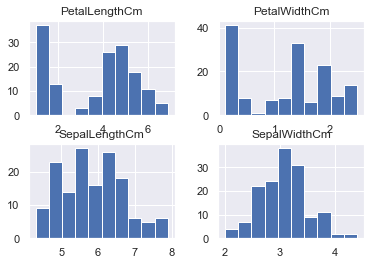

In [46]:
iris.hist()

In [47]:
# within cluster sum of squares
wcss = []
# 'k_number' is the highest number of clusters we want to use the WCSS method for. We have chosen it arbitarily
k_number =15
for i in range (1,k_number):
    kmeans= KMeans(i)
    kmeans.fit(iris.values)
# inertia calculates the sum of distances of all the points within a cluster from the centroid of that cluster.
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


Text(0, 0.5, 'Within-cluster Sum of Squares')

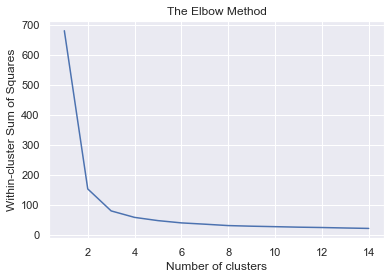

In [48]:
number_clusters = range(1,k_number)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [49]:
# In the above graph we can observe that the point after which the WCSS is decreasing is 3.
kmeans = KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10,random_state=0)
kmeans.fit(iris.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [50]:
# Copying the values of iris dataframe into clusters data frame
clusters =iris.copy()
# Making a new column
clusters['cluster_pred']=kmeans.fit_predict(iris.values)
clusters['cluster_pred']= clusters['cluster_pred'].map({0 :'Iris-setosa', 1 : 'Iris-versicolor' , 2 : 'Iris-virginica'})

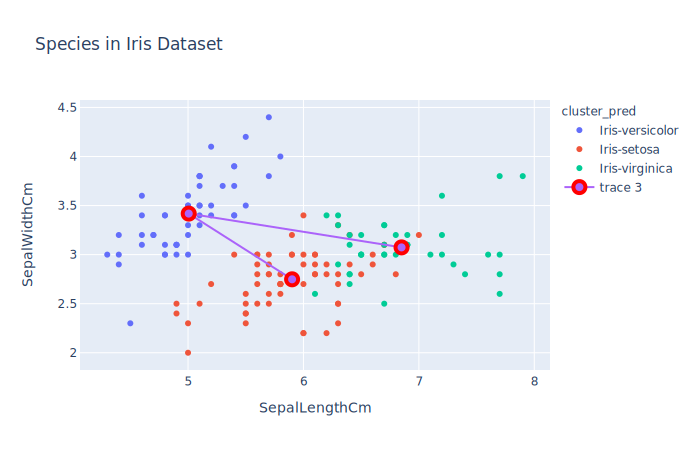

In [51]:
fig=px.scatter(clusters, x="SepalLengthCm", y="SepalWidthCm", color="cluster_pred",title="Species in Iris Dataset")
fig.add_scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],marker=dict(size=12,
                              line=dict(width=4,
                                        color='Red')))

## Standardize the variables

In [52]:
import pandas as pd
iris=pd.read_csv("Iris.csv",usecols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
iris_scaled = preprocessing.scale(iris)
iris1=pd.DataFrame(iris_scaled)
iris1.columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [53]:
wcss = []
# 'cl_num' is the highest number of clusters we want to use the WCSS method. It is of our choice.
cl_num =15
for i in range (1,cl_num):
    kmeans_3= KMeans(i)
    kmeans_3.fit(iris1)
    wcss_iter = kmeans_3.inertia_
    wcss.append(wcss_iter)


Text(0, 0.5, 'Within-cluster Sum of Squares')

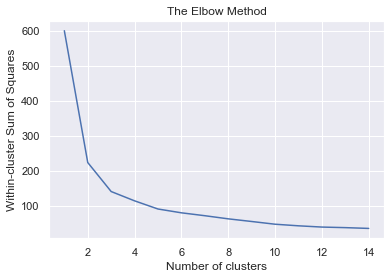

In [54]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [55]:
# The number of clusters did not differ. k=3 
kmeans_3 = KMeans(3)
kmeans_3.fit(iris1.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
# clusters_3 = iris.copy()
iris1['cluster_pred']=kmeans_3.fit_predict(iris1.values)
iris1['cluster_pred'] = iris1['cluster_pred'].map({0:'Iris-setosa', 1:'Iris-versicolor' , 2:'Iris-virginica'})
iris1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster_pred
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [57]:
cluster_centers=preprocessing.scale(kmeans_3.cluster_centers_[:, :])
cluster_centers

array([[-1.17358987,  1.16914178, -1.36129248, -1.3446147 ],
       [ 1.27017997,  0.10450866,  1.01255299,  1.05179185],
       [-0.0965901 , -1.27365044,  0.34873948,  0.29282285]])

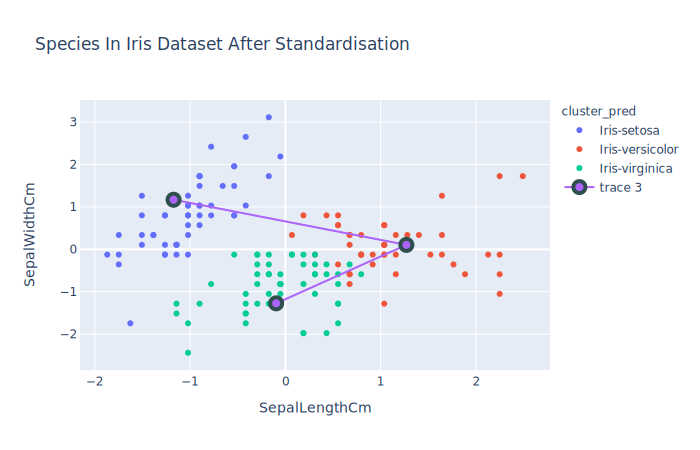

In [58]:
fig=px.scatter(iris1, x="SepalLengthCm", y="SepalWidthCm", color="cluster_pred",title="Species In Iris Dataset After Standardisation")
fig.add_scatter(x=cluster_centers[:,0],y=cluster_centers[:, 1],marker=dict(size=12,
                              line=dict(width=4,
                                        color='DarkSlateGrey')))

In [59]:
# We have got the answers for both scaled and unscaled data. Now, let us compare which one matches the real dataset more

In [60]:
import pandas as pd
iris=pd.read_csv("Iris.csv",usecols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

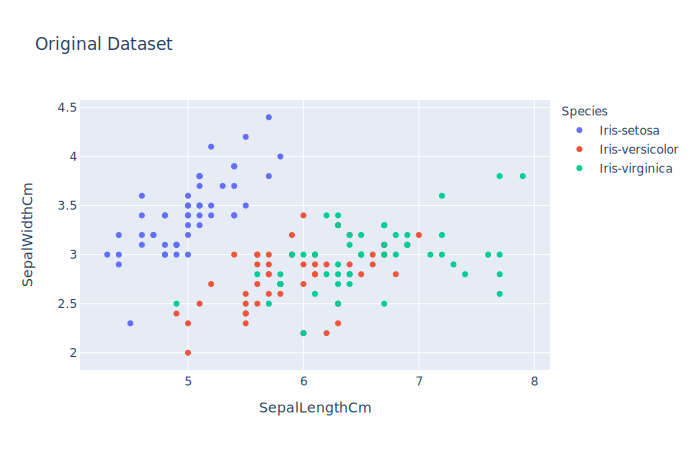

In [61]:
import plotly.express as px
px.scatter(iris, x="SepalLengthCm", y="SepalWidthCm", color="Species",title="Original Dataset")

## Conclusion

### It is quite evident that the scaled data is producing better results when compared to unscaled data.